<h1>전기차 2020년도 충전소 데이터 분석</h1>
2020데이터 기준

충전소 사용량이 많은곳 확인 (구별로 mean,sum,count(충전횟수))

충전소 분석


########

부가적으로 전기차 차량대수 광주 구별로 따지고 / 구별로 충전소 갯수확인해서

1차원적으로 차량대수에 비하여 충전소가 적은곳을 확인 (간단한 입지 선별)

간단하지않았다.

<h2>시작하기전 필요한 라이브러리 정리</h2>

In [111]:
import warnings
import pandas as pd
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import platform
import datetime
from collections import Counter
warnings.filterwarnings('ignore')

if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name,size=8)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic',size=8)
#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

<h2>광주 광역시 2020년 전체 전기차 충전소 사용횟수</h2>

In [112]:
df=pd.read_csv('광주광역시_전기차충전소충전량(2020)-2.csv')  #데이터확인
df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,...,충전종료시각,지역(구),지역(동),충전시각,충전시각(분),day,month,hour,시간당 충전량,time
0,0,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,11.910,...,2020-01-01 23:05,광산구,하남동,0 days 01:57:00,117,1,1,21,6.107692,21:08
1,1,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,22.060,...,2020-01-01 0:35,광산구,하남동,0 days 03:17:00,197,31,12,21,6.719464,21:18
2,2,광주전남,광산,하남2지구 중흥S-클래스,완속01,2703,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,16.120,...,2020-01-02 20:20,광산구,하남동,0 days 02:38:00,158,2,1,17,6.122294,17:42
3,3,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,11.210,...,2020-01-02 22:25,광산구,하남동,0 days 01:46:00,106,2,1,20,6.344086,20:39
4,4,광주전남,광산,하남2지구 중흥S-클래스,완속01,2703,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,5.610,...,2020-01-03 14:15,광산구,하남동,0 days 00:54:00,54,3,1,13,6.233333,13:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54148,54525,광주전남,서광주,유니버시아드힐스테이트2단지,급속01,8284,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)",급속,50,9.318,...,2020-12-02 9:57,서구,화정2동,0 days 00:47:00,47,2,12,9,11.824873,9:10
54149,54526,광주전남,서광주,광천e편한세상아파트,급속01,8506,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50,40.960,...,2020-12-03 8:49,서구,광천동,0 days 09:40:00,580,2,12,23,4.237534,23:09
54150,54527,광주전남,서광주,유니버시아드힐스테이트2단지,급속01,8284,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)",급속,50,33.600,...,2020-12-02 9:05,서구,화정2동,0 days 00:55:00,55,2,12,8,36.801752,8:10
54151,54528,광주전남,광산,우산국제미소래아파트,완속01,8430,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7,49.190,...,2020-12-03 4:52,광산구,우산동,0 days 07:47:00,467,2,12,21,6.312885,21:05


In [113]:
df['광주광역시'] = df['주소'].apply(lambda x: x if x.startswith('광주광역시') else np.NaN)  #광주광역시 컬럼생성
df.value_counts() #광주 충전기 사용횟수
df

,Unnamed: 0,본부,사업소,충전소명,충전기,충전기ID,주소,충전기구분,충전용량,충전량,...,지역(구),지역(동),충전시각,충전시각(분),day,month,hour,시간당 충전량,time,광주광역시
0,0,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,11.910,...,광산구,하남동,0 days 01:57:00,117,1,1,21,6.107692,21:08,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
1,1,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,22.060,...,광산구,하남동,0 days 03:17:00,197,31,12,21,6.719464,21:18,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
2,2,광주전남,광산,하남2지구 중흥S-클래스,완속01,2703,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,16.120,...,광산구,하남동,0 days 02:38:00,158,2,1,17,6.122294,17:42,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
3,3,광주전남,광산,하남2지구 중흥S-클래스,완속02,2704,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,11.210,...,광산구,하남동,0 days 01:46:00,106,2,1,20,6.344086,20:39,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
4,4,광주전남,광산,하남2지구 중흥S-클래스,완속01,2703,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)",완속,7,5.610,...,광산구,하남동,0 days 00:54:00,54,3,1,13,6.233333,13:21,"광주광역시 광산구 목련로21번길 20 (산정동, 하남2지구 중흥S-클래스)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54148,54525,광주전남,서광주,유니버시아드힐스테이트2단지,급속01,8284,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)",급속,50,9.318,...,서구,화정2동,0 days 00:47:00,47,2,12,9,11.824873,9:10,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)"
54149,54526,광주전남,서광주,광천e편한세상아파트,급속01,8506,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)",급속,50,40.960,...,서구,광천동,0 days 09:40:00,580,2,12,23,4.237534,23:09,"광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)"
54150,54527,광주전남,서광주,유니버시아드힐스테이트2단지,급속01,8284,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)",급속,50,33.600,...,서구,화정2동,0 days 00:55:00,55,2,12,8,36.801752,8:10,"광주광역시 서구 화정로 211 (화정동, 유니버시아드 힐스테이트 2단지)"
54151,54528,광주전남,광산,우산국제미소래아파트,완속01,8430,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)",완속,7,49.190,...,광산구,우산동,0 days 07:47:00,467,2,12,21,6.312885,21:05,"광주광역시 광산구 용아로 175 (우산동, 국제미소래아파트)"


In [114]:
df.groupby(['지역(구)','지역(동)'])['충전량'].sum().to_frame().T #지역구 확인 마지막에 첨단2동이 있음

지역(구)     광산구                                                           
지역(동)     도산동        비아동   삼도동    송정1동       송정2동       수완동       신가동   
충전량    132.82  17099.956  5.27  184.25  11897.628  76069.95  21314.07  \

지역(구)                                ...      서구                        
지역(동)       신창동      신흥동        어룡동  ...    상무1동      상무2동        서창동   
충전량    8720.982  2069.27  77019.014  ...  1136.9  14778.14  370182.33  \

지역(구)                                                               첨단2동  
지역(동)       양동       유덕동       치평동       풍암동      화정2동     화정4동     첨단2동  
충전량    9013.19  21670.24  9633.058  42562.72  6704.088  5482.42  4703.14  

[1 rows x 60 columns]

In [115]:
df.loc[df['지역(구)'] == '첨단2동','지역(구)'] = '광산구' #컬럼내의 첨단2동으로 되어있는 지역구를 광산구로 변경
df = df.reset_index(drop=True)
df['지역(구)']

0        광산구
1        광산구
2        광산구
3        광산구
4        광산구
        ... 
54148     서구
54149     서구
54150     서구
54151    광산구
54152     서구
Name: 지역(구), Length: 54153, dtype: object

In [116]:
df['광주광역시'].value_counts() # 충전소별 충전횟수확인

광주광역시
광주광역시 서구 불암길 154 (매월동)                  8331
광주광역시 북구 불태3로 3 (월출동)                   7689
광주광역시 서구 화운로 278 (광천동, 광천 e편한세상)        1415
광주광역시 광산구 소촌로 3 (소촌동, 한국전력공사)           1402
광주광역시 서구 회재로 973 (풍암동, 풍암호수(2호) 화장실)    1390
                                        ... 
광주광역시 서구 내방로 152                           1
광주광역시 남구 진월동 314-1                         1
광주광역시 광산구 운남동 524-3                        1
광주광역시 북구 충효동 805번지                         1
광주광역시 북구 첨단과기로 339                         1
Name: count, Length: 134, dtype: int64

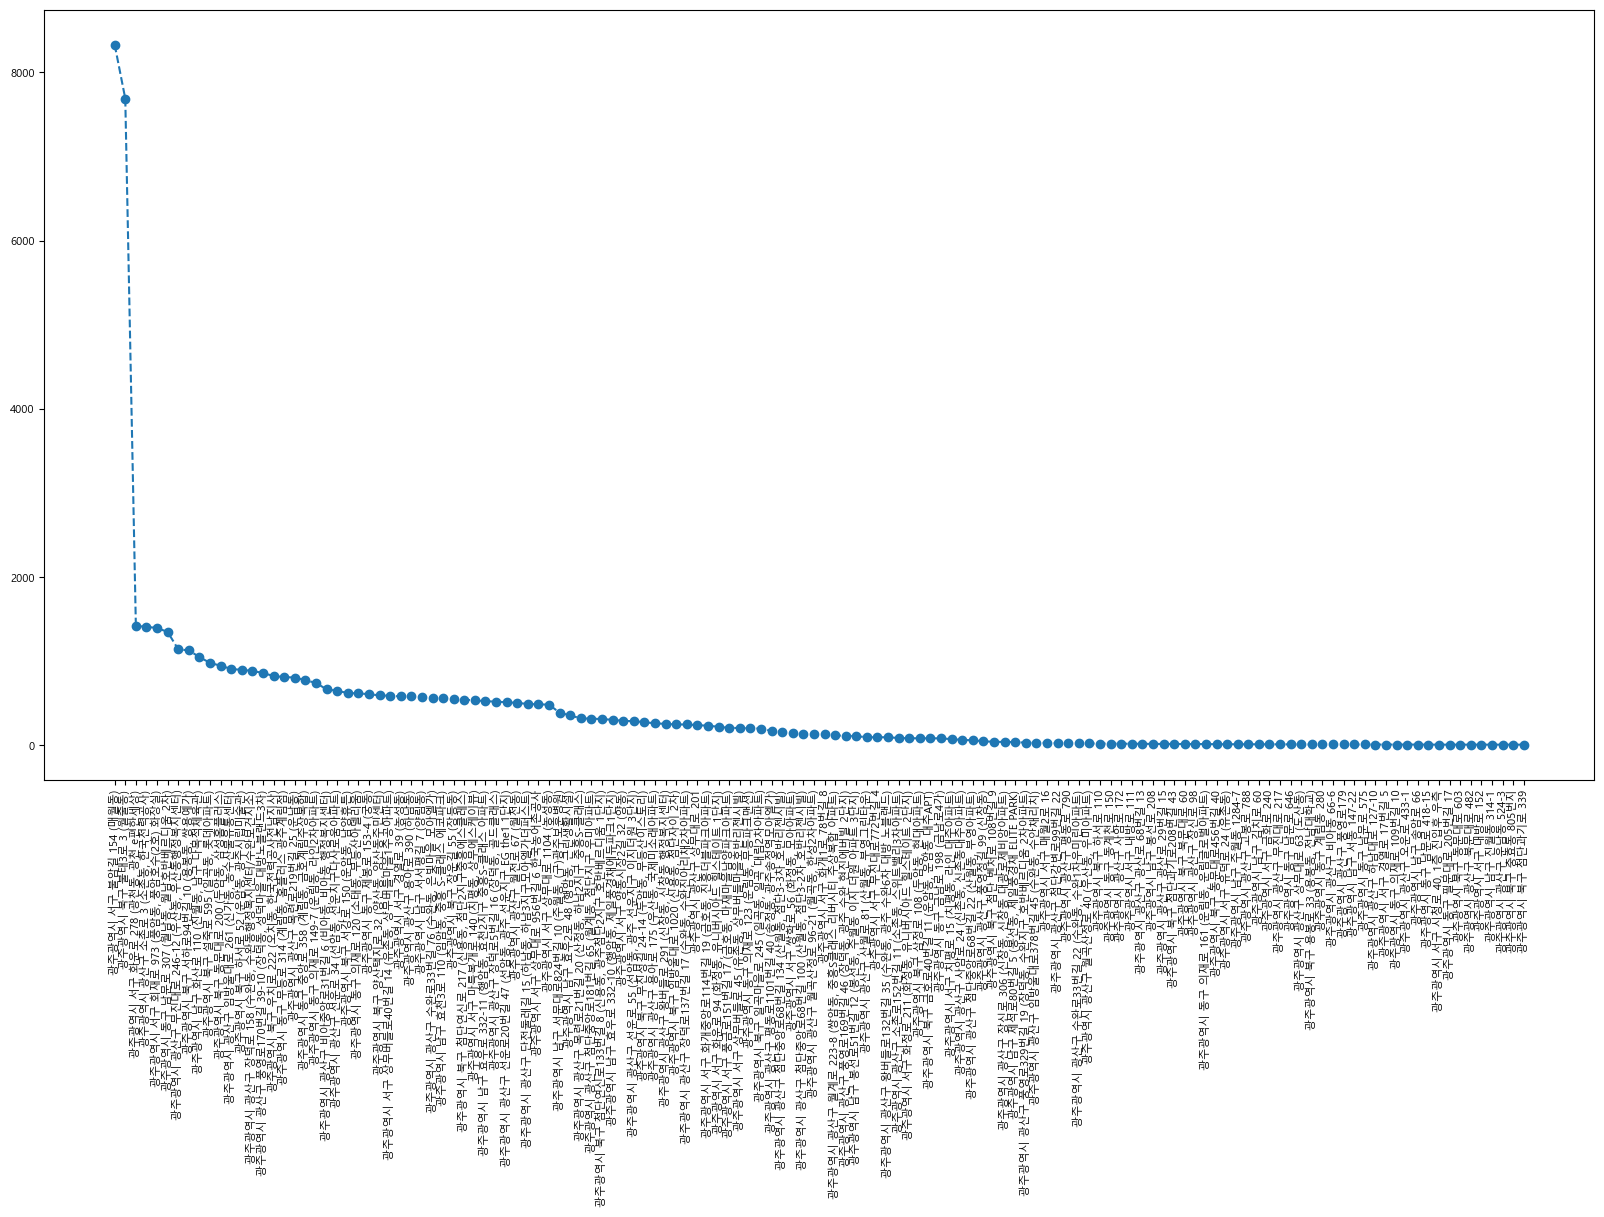

In [117]:
#광주광역시 충전소별 충전횟수 2021-07~2021-12
counts = df['광주광역시'].value_counts()
fig, ax = plt.subplots(figsize=(20,10), ncols=1, nrows=1)

ax.plot(counts.index, counts.values, linestyle='--', marker='o')
ax.set_xticklabels(counts.index, rotation=90)

plt.show()

위 그래프를보면 비정상적으로 높은 수치가 보이는 곳이 두군대가 보입니다.
<br>
두군대의 수치를 자세히 확인하기위해 아래에서 구별로 쪼개봅니다

<h2>구별 2020-01~2020-11까지의 충전소 사용횟수</h2>

In [118]:
df['서구'] = df['광주광역시'].apply(lambda x: x if x.startswith('광주광역시 서구') else np.NaN)
df['동구'] = df['광주광역시'].apply(lambda x: x if x.startswith('광주광역시 동구') else np.NaN)
df['광산구'] = df['광주광역시'].apply(lambda x: x if x.startswith('광주광역시 광산구') else np.NaN)
df['남구'] = df['광주광역시'].apply(lambda x: x if x.startswith('광주광역시 남구') else np.NaN)
df['북구'] = df['광주광역시'].apply(lambda x: x if x.startswith('광주광역시 북구') else np.NaN)

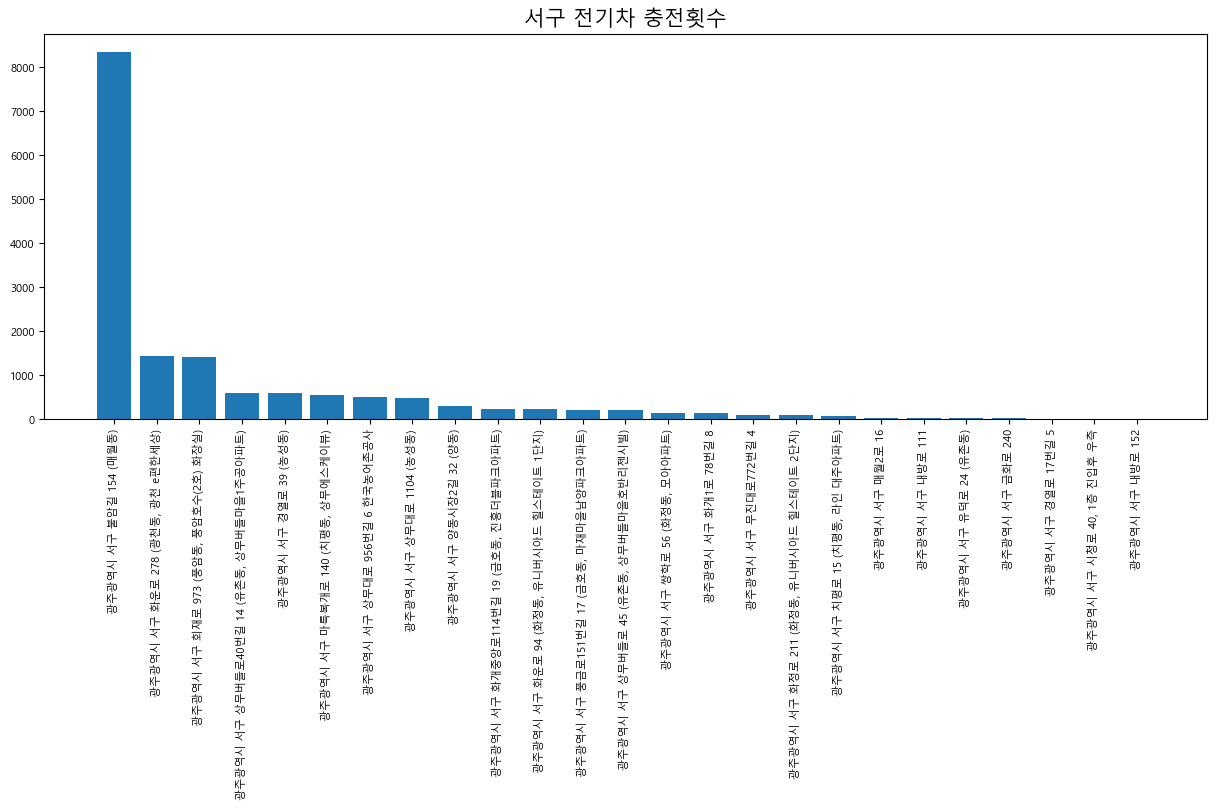

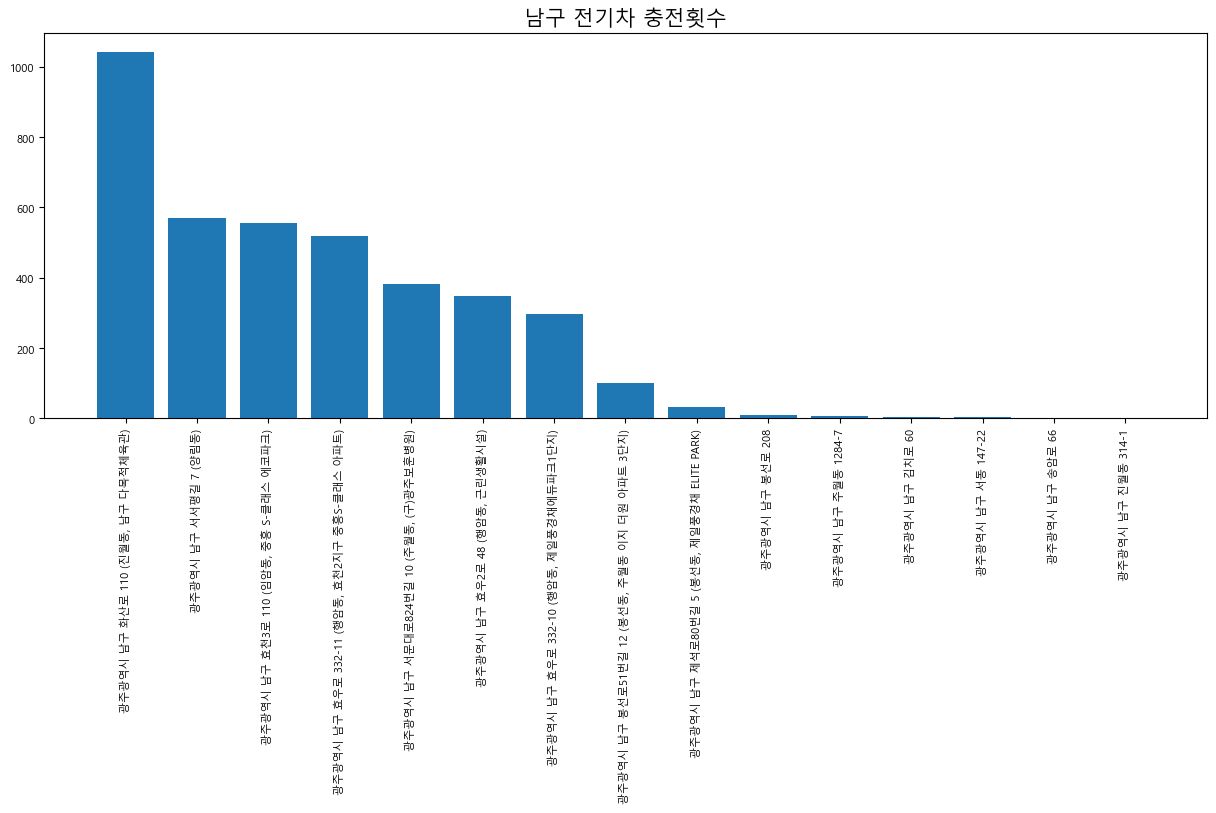

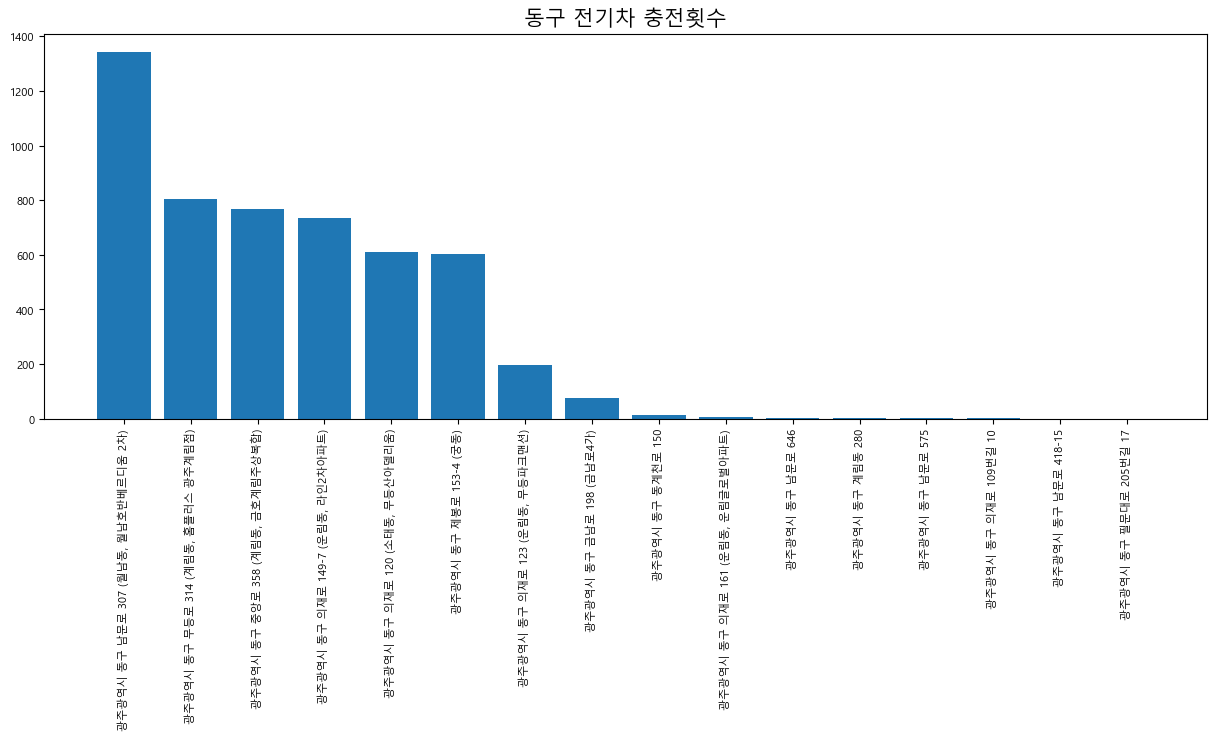

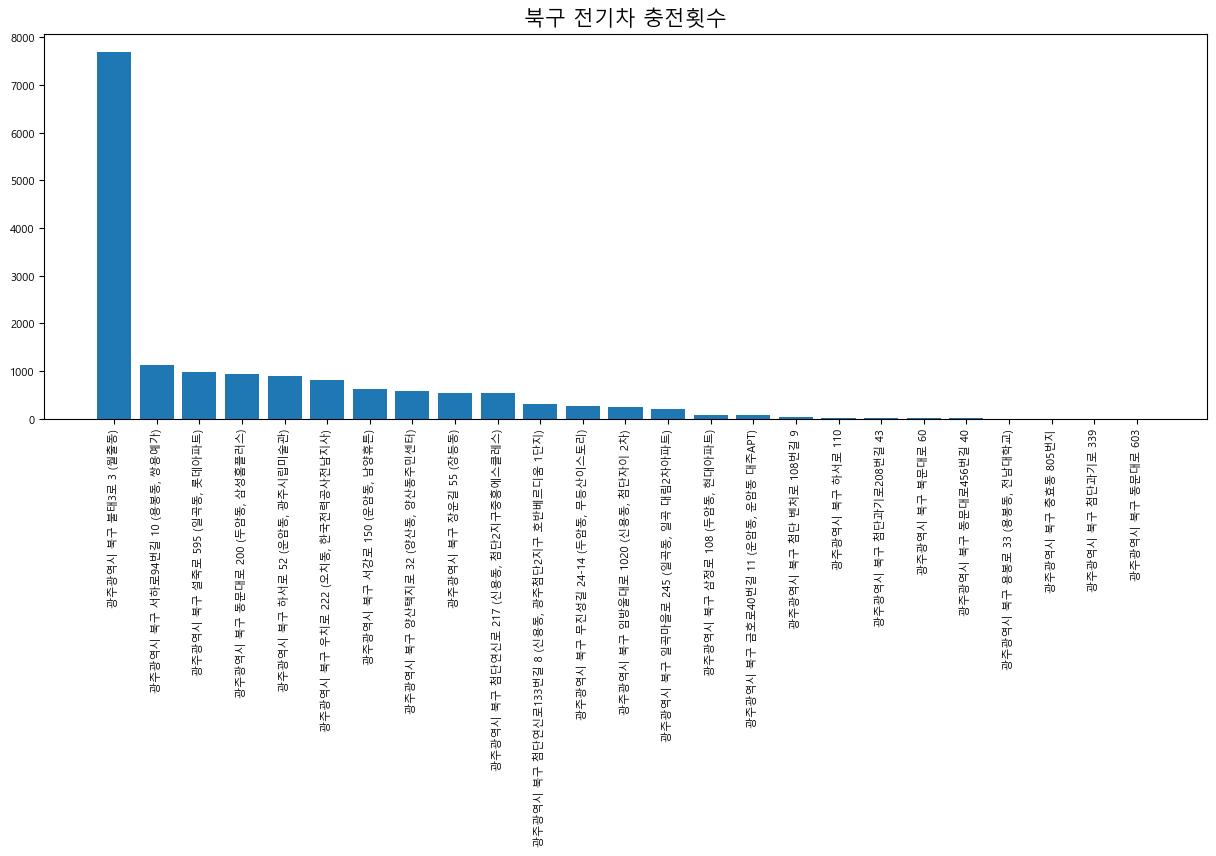

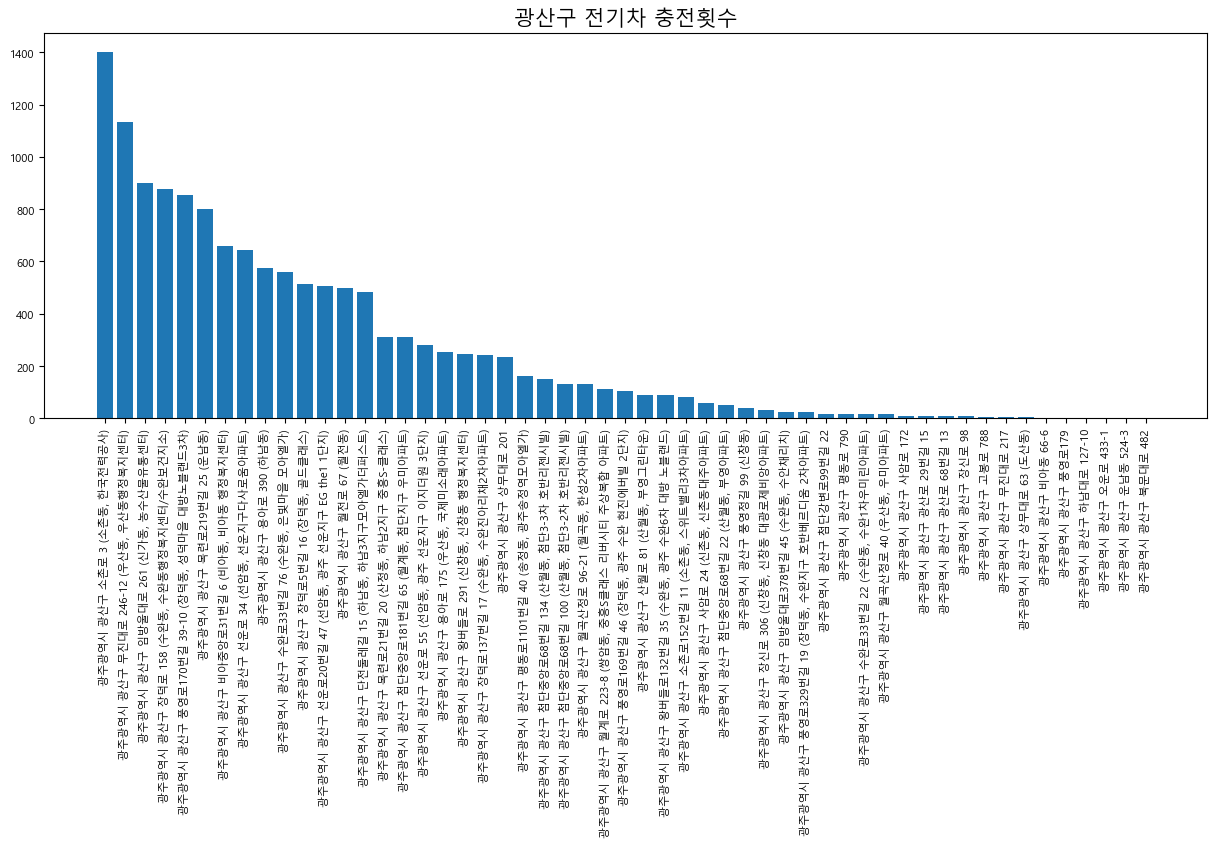

In [119]:
plt.figure(figsize=(15,5)) 
plt.title('서구 충전소별 사용빈도')
counts = df['서구'].dropna().value_counts() 
plt.bar(counts.index, counts.values)
plt.title('서구 전기차 충전횟수',fontsize=15)
plt.xticks(rotation=90)

plt.figure(figsize=(15,5)) 
plt.title('남구 충전소별 사용빈도')
counts = df['남구'].dropna().value_counts()
plt.bar(counts.index, counts.values)
plt.title('남구 전기차 충전횟수',fontsize=15)
plt.xticks(rotation=90)

plt.figure(figsize=(15,5)) 
plt.title('동구 충전소별 사용빈도')
counts = df['동구'].dropna().value_counts()
plt.bar(counts.index, counts.values)
plt.title('동구 전기차 충전횟수',fontsize=15)
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
plt.title('북구 충전소별 사용빈도')
counts = df['북구'].dropna().value_counts()
plt.bar(counts.index, counts.values)
plt.title('북구 전기차 충전횟수',fontsize=15)
plt.xticks(rotation=90)

plt.figure(figsize=(15,5))
plt.title('광산구 충전소별 사용빈도')
counts = df['광산구'].dropna().value_counts()
plt.bar(counts.index, counts.values)
plt.title('광산구 전기차 충전횟수',fontsize=15)
plt.xticks(rotation=90)


plt.show()

서구 남구 동구 광산구 북구별 충전소 충전횟수를 확인해보았을떄 동구,남구,광산구는 1500회를 넘는 수치가 없었으나,
<br>
북구와 광산구는 8000회,9000회로 비이상적인 수치를 보였습니다.
<br>
이렇게 이상한 수치를 보이는 충전소를 확인한결과, 광주광역시내 전기버스 충전소임을 확인하였습니다.
<br>
<br>
이 데이터들을 급속충전소와 완속충전소로 나눠서 확인해보겠습니다.

<h2>광주광역시  2020년도 기준 급속충전소와 완속충전소 갯수 와 구별 사용량,평균</h2>

In [120]:
#급속 충전소와 완속 충전소의 총 충전량 합산
asc = df.loc[:, ('광주광역시', '충전기구분' )]
bas = asc[asc['충전기구분'] == '급속']
bas['광주광역시'].drop_duplicates(inplace=True)
bas.drop_duplicates(subset=['광주광역시'], keep='first', inplace=True)
baas =  bas.count()
baas

광주광역시    106
충전기구분    106
dtype: int64

In [121]:
asc = df.loc[:, ('광주광역시', '충전기구분' )]
zat = asc[asc['충전기구분'] == '완속']
zat['광주광역시'].drop_duplicates(inplace=True)
zat.drop_duplicates(subset=['광주광역시'], keep='first', inplace=True)
zass = zat.count()
zass

광주광역시    53
충전기구분    53
dtype: int64

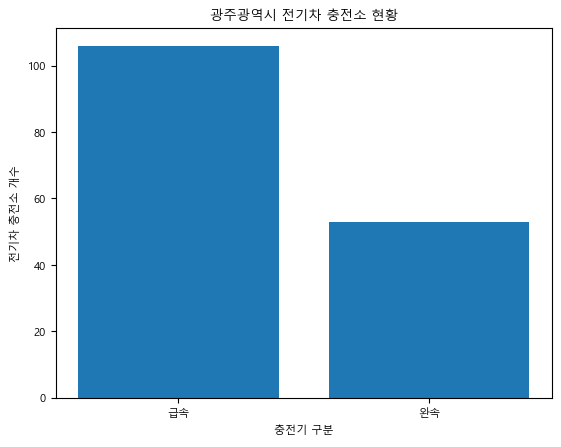

In [122]:
x_labels = ['급속', '완속']
y_values = [baas[0], zass[0]]

# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('광주광역시 전기차 충전소 현황')
plt.xlabel('충전기 구분')
plt.ylabel('전기차 충전소 개수')

# 그래프 출력
plt.show()

광주광역시 전기차 급속충전소와 완속충전소의 갯수를 알아 보았더니 급속충전소가 완속보다 더 많은 것으로 확인되었습니다.
<br>
완속충전소는 아파트 주차장쪽에 많이 배치되어있고 급속충전소는 다목적시설 공공시설에 주로 설치가 되어있습니다.
<br>
이를 통해 주거지보다는 다목적시설 공공시설쪽에 급속충전기를 많이두는걸 확인하였습니다.
<br>
<br>
이어서 각구별의 충전소 충전량과 충전평균을 확인해보고 급속과 완속으로 나누어서 확인해보겠습니다.



In [123]:
asc = df.loc[:, ('충전기구분', '서구', '충전량')]
zat = asc.dropna(subset=['서구'])
zat = zat.loc[:, ('서구', '충전량')]
we_sum = zat['충전량'].sum()
we_mean = zat['충전량'].mean()

In [124]:
asc = df.loc[:, ('충전기구분', '동구', '충전량')]
zat = asc.dropna(subset=['동구'])
zat = zat.loc[:, ('동구', '충전량')]
es_sum = zat['충전량'].sum()
es_mean = zat['충전량'].mean()

In [125]:
asc = df.loc[:, ('충전기구분', '광산구', '충전량')]
zat = asc.dropna(subset=['광산구'])
zat = zat.loc[:, ('광산구', '충전량')]
me_sum = zat['충전량'].sum()
me_mean = zat['충전량'].mean()

In [126]:
asc = df.loc[:, ('충전기구분', '남구', '충전량')]
zat = asc.dropna(subset=['남구'])
zat = zat.loc[:, ('남구', '충전량')]
sa_sum = zat['충전량'].sum()
sa_mean = zat['충전량'].mean()

In [127]:
asc = df.loc[:, ('충전기구분', '북구', '충전량')]
zat = asc.dropna(subset=['북구'])
zat = zat.loc[:, ('북구', '충전량')]
no_sum = zat['충전량'].sum()
no_mean = zat['충전량'].mean()

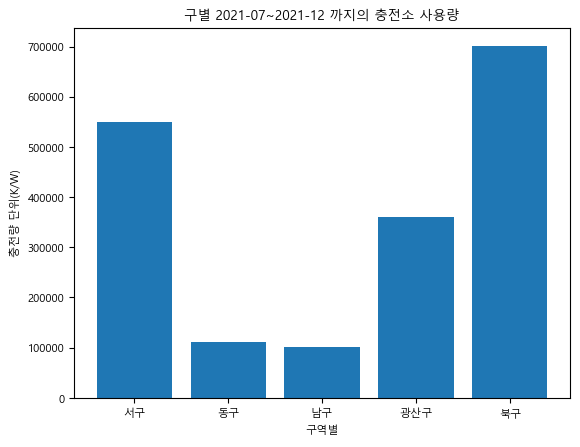

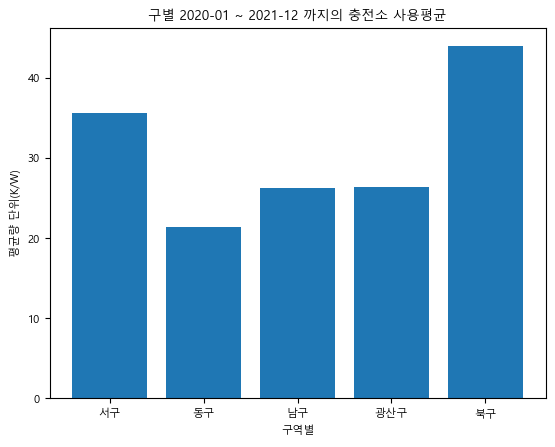

In [128]:
x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_sum,es_sum,sa_sum,me_sum,no_sum]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2021-07~2021-12 까지의 충전소 사용량')
plt.xlabel('구역별')
plt.ylabel('충전량 단위(K/W)')

# 그래프 출력
plt.show()

x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_mean,es_mean,sa_mean,me_mean,no_mean]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2020-01 ~ 2021-12 까지의 충전소 사용평균')
plt.xlabel('구역별')
plt.ylabel('평균량 단위(K/W)')

# 그래프 출력
plt.show()

구별 충전량과 충전 평균을 확인해보았더니 사용평균,사용량이 서구와 북구가 압도적이게 많이 나오는걸확인했습니다.
<br>
이러한 결과 보았을떄 위에서 말씀드린 전기버스 충전소가 서구와 북구에 배치되어 있기 떄문에 높은 수치를 보이는걸로 판단됩니다.
<br>
<br>
이어서 구별 충전소 사용량 평균과 총사용량을 급속과 완속으로 나누어서 확인해보겠습니다.

<h2>구별 완속 충전소 총사용량,평균</h2>

In [129]:
asc = df.loc[:, ('충전기구분', '서구', '충전량')]
zat = asc.dropna(subset=['서구'])
zat = zat[zat['충전기구분'] == '완속']
zat = zat.loc[:, ('서구', '충전량')]
we_sum1 = zat['충전량'].sum()
we_mean1 = zat['충전량'].mean()

In [130]:
asc = df.loc[:, ('충전기구분', '동구', '충전량')]
zat = asc.dropna(subset=['동구'])
zat = zat[zat['충전기구분'] == '완속']
zat = zat.loc[:, ('동구', '충전량')]
es_sum1 = zat['충전량'].sum()
es_mean1 = zat['충전량'].mean()


In [131]:
asc = df.loc[:, ('충전기구분', '남구', '충전량')]
zat = asc.dropna(subset=['남구'])
zat = zat[zat['충전기구분'] == '완속']
zat = zat.loc[:, ('남구', '충전량')]
sa_sum1 = zat['충전량'].sum()
sa_mean1 = zat['충전량'].mean()

In [132]:
asc = df.loc[:, ('충전기구분', '광산구', '충전량')]
zat = asc.dropna(subset=['광산구'])
zat = zat[zat['충전기구분'] == '완속']
zat = zat.loc[:, ('광산구', '충전량')]
me_sum1 = zat['충전량'].sum()
me_mean1 = zat['충전량'].mean()

In [133]:
asc = df.loc[:, ('충전기구분', '북구', '충전량')]
zat = asc.dropna(subset=['북구'])
zat = zat[zat['충전기구분'] == '완속']
zat = zat.loc[:, ('북구', '충전량')]
no_sum1 = zat['충전량'].sum()
no_mean1 = zat['충전량'].mean()

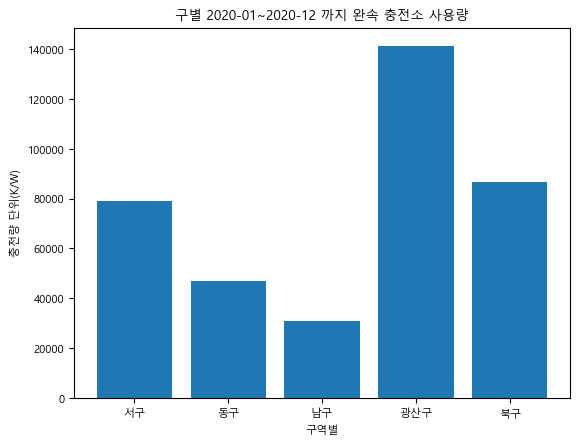

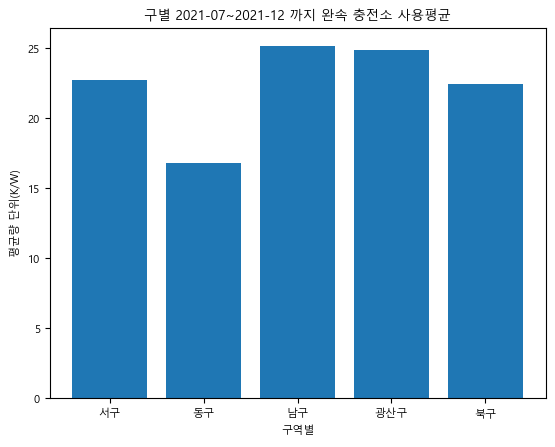

In [134]:

x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_sum1,es_sum1,sa_sum1,me_sum1,no_sum1]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2020-01~2020-12 까지 완속 충전소 사용량')
plt.xlabel('구역별')
plt.ylabel('충전량 단위(K/W)')

# 그래프 출력
plt.show()

x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_mean1,es_mean1,sa_mean1,me_mean1,no_mean1]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2021-07~2021-12 까지 완속 충전소 사용평균')
plt.xlabel('구역별')
plt.ylabel('평균량 단위(K/W)')

# 그래프 출력
plt.show()

각구별 완속충전소의 사용평균량(충전량)은 동구가 가장낮음을 보였고 남구와 광산구는 비슷한정도를 보였습니다.
<br>
충전소 사용량은 남구가 가장 낮고 광산구가 가장 높게 나왔습니다.
<br>
이는 광산구에 전기차 충전소가 다른 구에 비하여 많기 떄문에 보이는 결과이고, 전기버스 충전소가 있는 서구와 북구는 광산구보다
<br>
낮은 수치를 보이는걸 보았을때 전기버스 충전소는 급속충전소 임이 예상되므로
<br>
<br>
확인을 위해 급속충전소의 총사용량,평균을 확인해보겠습니다.

<h2>구별 급속 충전소 총사용량,평균</h2>

In [135]:
asc = df.loc[:, ('충전기구분', '서구', '충전량')]
zat = asc.dropna(subset=['서구'])
zat = zat[zat['충전기구분'] == '급속']
zat = zat.loc[:, ('서구', '충전량')]
we_sum2 = zat['충전량'].sum()
we_mean2 = zat['충전량'].mean()

In [136]:
asc = df.loc[:, ('충전기구분', '동구', '충전량')]
zat = asc.dropna(subset=['동구'])
zat = zat[zat['충전기구분'] == '급속']
zat = zat.loc[:, ('동구', '충전량')]
es_sum2 = zat['충전량'].sum()
es_mean2 = zat['충전량'].mean()

In [137]:
asc = df.loc[:, ('충전기구분', '남구', '충전량')]
zat = asc.dropna(subset=['남구'])
zat = zat[zat['충전기구분'] == '급속']
zat = zat.loc[:, ('남구', '충전량')]
sa_sum2 = zat['충전량'].sum()
sa_mean2 = zat['충전량'].mean()

In [138]:
asc = df.loc[:, ('충전기구분', '광산구', '충전량')]
zat = asc.dropna(subset=['광산구'])
zat = zat[zat['충전기구분'] == '급속']
zat = zat.loc[:, ('광산구', '충전량')]
me_sum2 = zat['충전량'].sum()
me_mean2 = zat['충전량'].mean()

In [139]:
asc = df.loc[:, ('충전기구분', '북구', '충전량')]
zat = asc.dropna(subset=['북구'])
zat = zat[zat['충전기구분'] == '급속']
zat = zat.loc[:, ('북구', '충전량')]
no_sum2 = zat['충전량'].sum()
no_mean2 = zat['충전량'].mean()

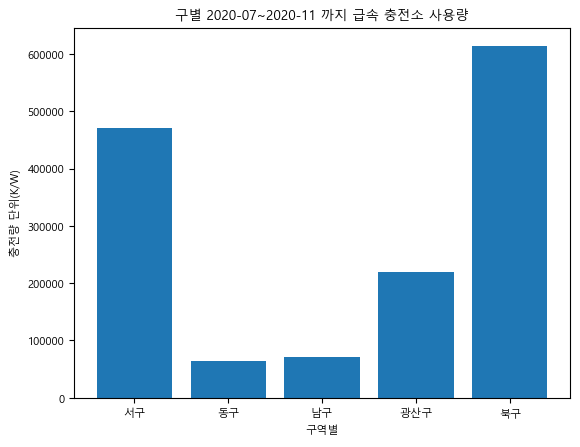

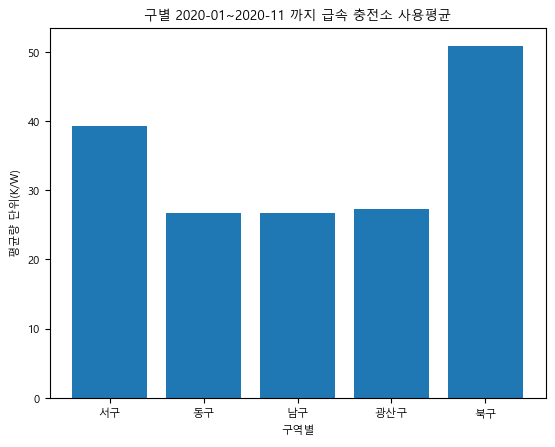

In [140]:
x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_sum2,es_sum2,sa_sum2,me_sum2,no_sum2]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2020-07~2020-11 까지 급속 충전소 사용량')
plt.xlabel('구역별')
plt.ylabel('충전량 단위(K/W)')

# 그래프 출력
plt.show()

x_labels = ['서구', '동구','남구','광산구','북구']
y_values = [we_mean2,es_mean2,sa_mean2,me_mean2,no_mean2]
# 바 그래프 생성
plt.bar(x_labels, y_values)

# 그래프 타이틀과 레이블 지정
plt.title('구별 2020-01~2020-11 까지 급속 충전소 사용평균')
plt.xlabel('구역별')
plt.ylabel('평균량 단위(K/W)')

# 그래프 출력
plt.show()

급속충전소 사용량과 사용평균을 확인한결과 서구와 북구의 수치가 사용평균과 사용량이 높은 수치를 보이는걸 미루어 보았을때
<br>
전기버스 충전소는 급속충전으로 확인되었습니다. 나머지 3개 구중에서도 광산구가 사용량이 많은것으로 보아
<br>
다른 구에비하여 광산구가 충전소가 많음을 확인하였습니다.
<br>
<br>
이어서 전기자동차 등록대수를 확인해보겠습니다.

<h2>각 구별 2021년도 까지 자동차 대수</h2>

In [142]:
df_car=pd.read_csv('광주광역시 전기차 등록현황 2020.csv', encoding='cp949')
df_car


,연번,시도명,자치구명,연도,전기차 등록대수,데이터기준일자
0,10,광주광역시,광산구,2020,846,2021-12-31
1,2,광주광역시,서구,2020,672,2022-12-31
2,3,광주광역시,북구,2020,898,2022-04-02
3,9,광주광역시,남구,2020,113,2022-05-12
4,5,광주광역시,동구,2020,263,2022-04-11


In [ ]:
df_car_list = df_car.loc[:, ('자치구명', '전기차 등록대수')]
df_car_list=df_car_list.reset_index(drop=True)
df_car_list

In [ ]:

df_car_list = df_car.loc[:, ('자치구명', '전기차 등록대수')]
x_data = df_car_list['자치구명']
y_data = df_car_list['전기차 등록대수']

plt.bar(x_data, y_data)
plt.show()

남구와 동구는 전기차 등록대수가 적고 북구가 가장많고 이어서 광산구 다음으로 서구순으로 되어있습니다.
<br>
광산구에는 전기차 충전소가 많이있음을 확인하였는데 북구보다 적은 자동차를 소유하고있습니다
<br>
<br>
소지량을 확인했으니 소지량만큼 충전소가 소지량에 비례하여 충전을 실시하고있는지 확인해보겠습니다.

<h2>광주광역시 전기차 충전소 충전량과 전기차 등록수의 상관관계</h2>

In [ ]:
df

In [ ]:
df['자치구명']=df['지역(구)']

In [ ]:
grouped = df.groupby('지역(구)')['충전량'].sum().sort_index(ascending=False)
merged_df = pd.merge(grouped, df_car_list, left_index=True, right_on='자치구명')

# 자치구명 기준으로 정렬하기
merged_df = merged_df.sort_values(by='자치구명', ascending=False)

# x, y 데이터 추출
x_data = merged_df['자치구명']
y_data1 = merged_df['충전량']
y_data2 = merged_df['전기차 등록대수']

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))
color_1 = 'tab:blue'
color_2 = 'tab:red'

ax1.set_title('2020 광주광역시 구별 충전소 충전량과 구별 전기차 등록대수', fontsize=20)
ax1.set_xlabel('광주광역시',fontsize=15)
ax1.set_ylabel('구별 전기차 충전소 충전량', fontsize=14, color=color_1)
ax1.plot(x_data, y_data1, marker='s', color=color_1)
ax1.tick_params(axis='y', labelcolor=color_1)

ax2 = ax1.twinx()
ax2.set_ylabel('구별 전기차 등록대수', fontsize=14, color=color_2)
ax2.plot(x_data, y_data2, marker='o', color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

fig.tight_layout()
plt.show()

구별 충전량과 전기차의 비례 그래프를 보았을때.
<br>
비슷하게 가는 그래프를 보이고있으나 광산구가 차량갯수에비하여 충전수가 많지않음을 확인할수있었습니다.
<br>
이를 보아 '전기버스는 서구와 북구쪽에서 충전하기 떄문이지않을까?' 라는 생각을 해보았지만,
<br>
그래프상 서구와 북구는 그래프가 거의 비슷하게 보이고있기 때문에 그이유는 아닐꺼라고 판단하였습니다.
<br>
<br>
광산구쪽 충전소현황을 자세히 알아보기위해 각 구마다 동별로 쪼개서 확인해보겠습니다

In [ ]:
correlation = merged_df['충전량'].corr(merged_df['전기차 등록대수'])
sns.scatterplot(x=merged_df['충전량'], y=merged_df['전기차 등록대수'])
plt.title('충전량과 전기차 등록대수: '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("전기차 충전소 충전량",fontsize=12)
plt.ylabel("전기차 등록대수",fontsize=12)
plt.show()

<h2>광주광역시 구별 월 전기충전소 사용량(시계열 2020-01 ~ 2020-11)</h2>

In [ ]:
df

In [ ]:
monthly = df[df['서구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자']) #충전 종료일자를 날짜 기준으로
monthly['월'] = monthly['충전종료일자'].dt.to_period('M') #월별로 정렬
monthly = monthly.groupby(['서구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 오천이 넘어가는곳은 전기버스 충전소이기 때문에 그래프에 표시하지 않습니다.
monthly = monthly[monthly['월'] != '2020-12'] # 12월은 3일까지의 데이터밖에없어 그래프에서 제거

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '서구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='서구', data=monthly_sum, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('서구 충전소별 월 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', data=monthly_total, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('서구 월별 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
monthly = df[df['동구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자'])
monthly['월'] = monthly['충전종료일자'].dt.to_period('M')
monthly = monthly.groupby(['동구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 오천이 넘어가는곳은 전기버스 충전소이기 때문에 그래프에 표시하지 않습니다.
monthly = monthly[monthly['월'] != '2020-12']

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '동구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='동구', data=monthly_sum, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('동구 충전소별 월 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', data=monthly_total, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('동구 월별 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
monthly = df[df['광산구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자'])
monthly['월'] = monthly['충전종료일자'].dt.to_period('M')
monthly = monthly.groupby(['광산구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 5000이 넘는 전기버스 충전소를 그래프상에서  제거
monthly = monthly[monthly['월'] != '2020-12']

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '광산구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='광산구', data=monthly_sum, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('광산구 충전소별 월 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', data=monthly_total, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('광산구 월별 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

너무많은 충전소를 월별로쪼개 시인성이 좋지않아
<br>
1월달 내용만 확인해보곘습니다

In [ ]:
monthly = df[df['광산구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자'])
monthly['월'] = monthly['충전종료일자'].dt.to_period('M')
monthly = monthly.groupby(['광산구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 오천이 넘어가는곳은 전기버스 충전소이기 때문에 그래프에 표시하지 않습니다.
monthly = monthly[monthly['월'] == '2020-01']

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '광산구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='광산구', data=monthly_sum, ax=ax)
ax.set_xlabel('1월')
ax.set_ylabel('충전소별 충전량')
ax.set_title('광산구 충전소별 충전량 2020-01', fontsize=20)
plt.xticks(ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

그래프를 확인했을때 3500이 가장높은 수치를가졌고 2000이상의 충전을하는 충전소는 6군대로 확인되었습니다
<br>
그중에서 가장 높은 수치를 보이는 장소는 광주광역시 광산구 소촌로 3(소촌동,한국전력공사) 였고
<br>
충전량이 500회도 못미치는곳은 14곳으로 확인되었습니다.
<br>
이 그래프를 보았을때 충전소의 갯수에 비하여 충전소를 들러 충전하는 전기차의 유동수가 적다는걸 확인하였습니다

In [ ]:
monthly = df[df['남구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자'])
monthly['월'] = monthly['충전종료일자'].dt.to_period('M')
monthly = monthly.groupby(['남구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 오천이 넘어가는곳은 전기버스 충전소이기 때문에 그래프에 표시하지 않습니다.
monthly = monthly[monthly['월'] != '2020-12']

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '남구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='남구', data=monthly_sum, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('남구 충전소별 월 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', data=monthly_total, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('남구 월별 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
monthly = df[df['북구'].notnull()].copy()
monthly['충전종료일자'] = pd.to_datetime(monthly['충전종료일자'])
monthly['월'] = monthly['충전종료일자'].dt.to_period('M')
monthly = monthly.groupby(['북구', '월'])['충전량'].sum().reset_index()
monthly = monthly[monthly['충전량'] <= 5000] # 오천이 넘어가는곳은 전기버스 충전소이기 때문에 그래프에 표시하지 않습니다.
monthly = monthly[monthly['월'] != '2020-12']

# 월별 서구별 충전량 합산
monthly_sum = monthly.groupby(['월', '북구'])['충전량'].sum().reset_index()

# 월별 충전량 합산
monthly_total = monthly_sum.groupby(['월'])['충전량'].sum().reset_index()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', hue='북구', data=monthly_sum, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('북구 충전소별 월 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='월', y='충전량', data=monthly_total, ax=ax)
ax.set_xlabel('월')
ax.set_ylabel('월별 충전량')
ax.set_title('북구 월별 충전량 2020-01 ~ 2020-11', fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()